In [1]:
import numpy as np
from activation import ReLU, Sigmoid

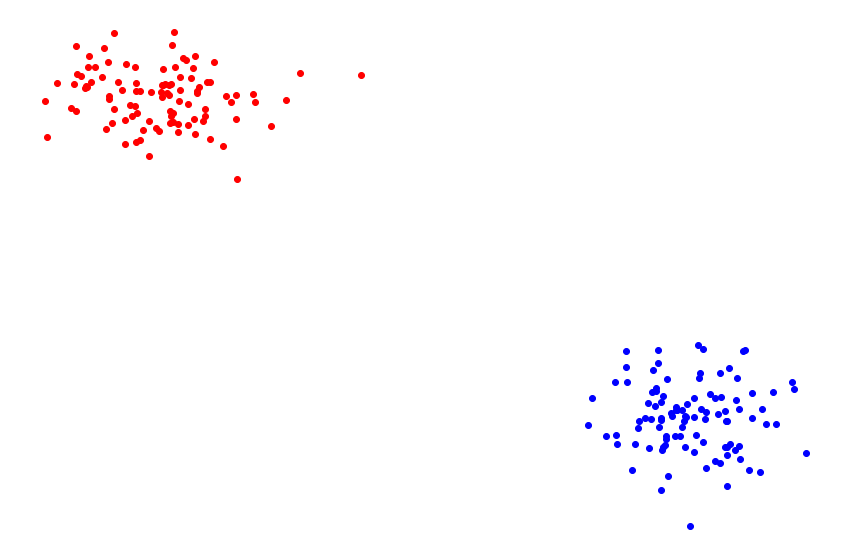

Dataset shape: (200, 1, 2)
Label shape: (200,)


In [265]:
import matplotlib.pyplot as plt
#Generate Data 

centroid_1 = np.array([-1, 1])
centroid_2 = np.array([1, -1])
dataset_size = 100

dataset_1 = np.array([centroid_1 + np.random.randn(1, centroid_1.shape[0])/5 for i in range(dataset_size)])
label_1 = np.ones(dataset_size)

dataset_2 = np.array([centroid_2 + np.random.randn(1, centroid_1.shape[0])/5 for i in range(dataset_size)])
label_2 = np.zeros(dataset_size)

X = np.concatenate([dataset_1, dataset_2], axis=0)
Y = np.concatenate([label_1, label_2], axis=0)


plt.figure(figsize=(15, 10))
plt.scatter(dataset_1[:, 0, 0], dataset_1[:, 0, 1], color='r')
plt.scatter(dataset_2[:, 0, 0], dataset_2[:, 0, 1], color='b')
plt.axis('off')
plt.show()

print('Dataset shape: {}'.format(X.shape))
print('Label shape: {}'.format(Y.shape))

In [266]:
#MLP
#One hidden layer MLP, ReLU activation

x = np.array([[1, -1]])
y = np.array([1])


#Define Parameters
print("\t -- Parameters definition --")
np.random.seed(42)

relu = ReLU()
sigmoid = Sigmoid()

input_size = 2
hidden_layer = [4]
output_size = 1


layers_size = [input_size] + hidden_layer + [output_size]
activation_func = [relu, sigmoid]
print("Layers size: {}".format(layers_size))

	 -- Parameters definition --
Layers size: [2, 4, 1]


In [267]:
print(x.shape)
print(X[0].shape)

(1, 2)
(1, 2)


In [268]:
#Weights initialization

print("\t -- Weights initialization -- \n \t -- Random initialization --")

def initialize_weights(input_size, output_size):
    
    return np.random.randn(output_size, input_size)

def initialize_biases(output_size):
    
    return np.random.randn(output_size, 1)




weights = []

weights.append(initialize_weights(layers_size[0], layers_size[1]))
weights.append(initialize_weights(layers_size[1], layers_size[2]))
print("Weights: {}".format(weights))

biases = []
biases.append(initialize_biases(layers_size[1]))
biases.append(initialize_biases(layers_size[2]))
print("Biases: {}".format(biases))

	 -- Weights initialization -- 
 	 -- Random initialization --
Weights: [array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986],
       [-0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473]]), array([[-0.46947439,  0.54256004, -0.46341769, -0.46572975]])]
Biases: [array([[ 0.24196227],
       [-1.91328024],
       [-1.72491783],
       [-0.56228753]]), array([[-1.01283112]])]


In [269]:
#Forward pass

print("\t -- Forward pass --")

def forward(x, weights, biases):
    
    L = len(weights)
    
    activations = [x] + [None] * L
    Z = [None] * L
    
    for i in range(L-1):
        Z[i] = np.dot(weights[i], activations[i].T) + biases[i]
        activations[i+1] = relu.activate(Z[0]).T



    Z[L-1] = np.dot(weights[L-1], activations[L-1].T) + biases[L-1]
    activations[L] = sigmoid.activate(Z[1]).T
    
    return Z, activations

Z, activations = forward(X[0], weights, biases)

print(X[0])
print(Z)
print(activations)


#Compute loss
def mse_loss(y, y_pred):
    
    return 1/2 * (y_pred - y)**2


def mse_derivative(y, y_pred):
    
    return y_pred - y

loss = mse_loss(activations[-1], y)
print("Loss: {}".format(loss))

	 -- Forward pass --
[[-0.93715053  0.81839518]]
[array([[-0.3366885 ],
       [-1.2738216 ],
       [-1.69709743],
       [-1.41418277]]), array([[-1.01283112]])]
[array([[-0.93715053,  0.81839518]]), array([[0., 0., 0., 0.]]), array([[0.26642616]])]
Loss: [[0.26906529]]


bla bla bla:


$$\frac{\partial \ell}{\partial W^{(l)}} = (W^{(l+1)} \cdot \delta^{(l+1)})\odot f'(Z^{(l)})^T \cdot A^{(l-1)} = 
\delta^{(l)} \cdot A^{(l-1)}$$
$$ \delta^{(l)} =  (W^{(l+1)} \cdot \delta^{(l+1)})\odot f'(Z^{(l)})^T$$
$$
\delta^{(L)} =  \frac{\partial \ell(o, y)}{\partial o} \odot \frac{\partial \sigma(z)}{\partial z}
$$


$$
\frac{\partial \ell}{\partial b^{(l)}} = (W^{(l+1)} \cdot \delta^{(l+1)})\odot f'(Z^{(l)})^T \cdot A^{(l-1)} = 
\delta^{(l)} \cdot A^{(l-1)}
$$


In [270]:
#Backpropagation

y_pred = activations[-1]



def backward(x, y, activations, weights, biases, Z):
    
    L = len(weights)
    dW = [None] * L
    db = [None] * L


    delta = mse_derivative(y, activations[-1]) * sigmoid.derivative(Z[-1])

    for k in range(L-1, 0, -1):
        dW[k] = delta * activations[k]
        db[k] = delta
        delta = (np.dot(weights[k], dW[k].T)) * relu.derivative(Z[k-1])

    dW[0] = np.dot(delta, x)
    db[0] = np.sum(delta, axis = 1).reshape(-1,1)
    
    return dW, db

for x,y in zip(X,Y):
    dW, db = backward(x, y, activations, weights, biases, Z)
    for l in range(L):
            weights[l] = weights[l] - 0.1*dW[l]
            biases[l] = biases[l] - 0.1*db[l]


print(weights)
print(biases)



[array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986],
       [-0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473]]), array([[-0.46947439,  0.54256004, -0.46341769, -0.46572975]])]
[array([[ 0.24196227],
       [-1.91328024],
       [-1.72491783],
       [-0.56228753]]), array([[-0.09982246]])]


In [271]:
#Optimization step

epochs = 1000
learning_rate = 0.1


    
losses = []
for epoch in range(epochs):

    L = len(weights)
    loss = []

    for x,y in zip(X,Y):
        Z, activations = forward(x, weights, biases)
        dW, db = backward(x, y, activations, weights, biases, Z)


        output = activations[-1]
        error = mse_loss(y, output)
        loss.append(error)

        for i in range(L):
            weights[i] = weights[i] - learning_rate*dW[i]
            biases[i] = biases[i] - learning_rate*db[i]

    losses.append(np.mean(np.array(loss)))

    if(epoch % 100 == 0):
        print('\t Epoch: {}'.format(epoch))
        print('Loss:{}'.format(losses[-1]))


	 Epoch: 0
Loss:0.055967958996738246
	 Epoch: 100
Loss:0.00014673228421532635
	 Epoch: 200
Loss:7.079542399057681e-05
	 Epoch: 300
Loss:4.644796235409052e-05
	 Epoch: 400
Loss:3.4501942949062413e-05
	 Epoch: 500
Loss:2.7418997645647806e-05
	 Epoch: 600
Loss:2.2736576017175896e-05
	 Epoch: 700
Loss:1.941324200347267e-05
	 Epoch: 800
Loss:1.693331570254409e-05
	 Epoch: 900
Loss:1.5012463321013e-05


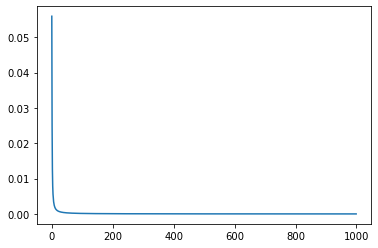

In [272]:
machine = np.arange(epochs)
plt.plot(machine, losses)